# Visualize the Multi-cell Whitenoise and Natural Scenes Models  

#### Using the new visualization toolbox of deep-retina

In [2]:
import numpy as np
from os.path import expanduser
import os
import json
import theano
import tableprint
import pyret.filtertools as ft
import pyret.visualizations as pyviz
from keras.models import model_from_json
import h5py
import matplotlib.pyplot as plt
from scipy.stats import pearsonr
%matplotlib inline
#%matplotlib qt

from pylab import rcParams
rcParams['figure.figsize'] = (10.0, 8.0) # set default size of plots
rcParams['image.interpolation'] = 'nearest'
rcParams['image.cmap'] = 'gray'

%load_ext autoreload
%autoreload 2

Using gpu device 0: GeForce GT 750M (CNMeM is disabled)


In [3]:
# deep retina imports
import visualizations as viz
from preprocessing import datagen, loadexpt
from modeltools import load_model, load_partial_model, list_layers, get_performance, get_weights

## Paths to model architecture and weights

In [4]:
# model trained on white noise
natural_model_path = expanduser('~/Dropbox/deep-retina/saved/lenna.nirum/2015-12-13 00.27.52 convnet/')
natural_weight_name = 'epoch098_iter07000_weights.h5'

# model trained on natural scenes
white_model_path = expanduser('~/Dropbox/deep-retina/saved/lenna.nirum/2015-12-13 23.20.03 convnet/')
white_weight_name = 'epoch097_iter06950_weights.h5'

## Load Keras Models

In [5]:
natural_multimodel = load_model(natural_model_path, natural_weight_name)
white_multimodel = load_model(white_model_path, white_weight_name)

## Get held-out performance (correlation coefficients) for all cells

In [5]:
white_white_performance = get_performance(white_multimodel, stim_type='white', cells=[0,1,2,3,4])
natural_white_performance = get_performance(natural_multimodel, stim_type='white', cells=[0,1,2,3,4])
white_natural_performance = get_performance(white_multimodel, stim_type='natural', cells=[0,1,2,3,4])
natural_natural_performance = get_performance(natural_multimodel, stim_type='natural', cells=[0,1,2,3,4])

Loading testing data... Done.
Loading testing data... Done.
Loading testing data... Done.
Loading testing data... Done.


In [6]:
print(tableprint.hr(5))
print(tableprint.header(['cell 0', 'cell 1', 'cell 2', 'cell 3', 'cell 4']))
print(tableprint.hr(5))
print(tableprint.row(white_white_performance))
print(tableprint.row(natural_white_performance))
print(tableprint.row(white_natural_performance))
print(tableprint.row(natural_natural_performance))
print(tableprint.hr(5))

+-----------+------------+------------+------------+-----------+
|cell 0     | cell 1     | cell 2     | cell 3     | cell 4    |
+-----------+------------+------------+------------+-----------+
|   0.71308 |    0.59542 |    0.59751 |    0.75943 |    0.65742|
|   0.42341 |    0.21536 |     0.2643 |    0.41659 |    0.18955|
|   0.37797 |    0.21918 |    0.29797 |    0.34462 |    0.23577|
|    0.5549 |    0.40883 |    0.44862 |    0.51509 |     0.5675|
+-----------+------------+------------+------------+-----------+


## Visualize learned weights of white noise model

### List all the layers of the model, with whatever parameters they have

In [7]:
list_layers(natural_model_path, natural_weight_name)

+-----------+------------+-----------+
|layer      | weights    | biases    |
+-----------+------------+-----------+
|   layer_0 |    param_0 |    param_1|
|   layer_1 |            |           |
|   layer_2 |            |           |
|   layer_3 |            |           |
|   layer_4 |    param_0 |    param_1|
|   layer_5 |            |           |
|   layer_6 |    param_0 |    param_1|
+-----------+------------+-----------+


### Conv Layer ('layer_0')  
You can pass the path or a numpy array of the weights

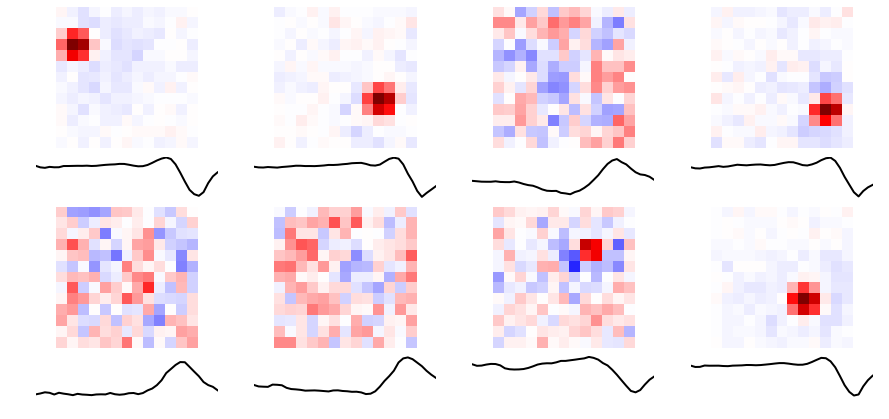

In [18]:
viz.visualize_convnet_weights(white_model_path + white_weight_name, normalize=True, fig_size=(15,7))

#### Are these filters low rank?

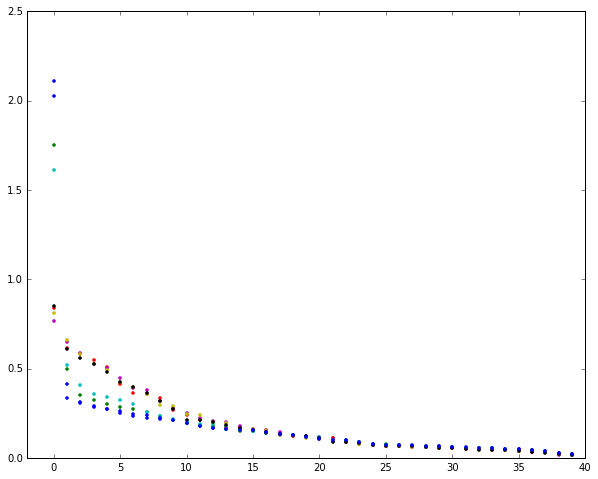

In [6]:
conv_filters = get_weights(white_model_path + white_weight_name, layer_name='layer_0')
for f in conv_filters:
    plt.plot(viz.singular_values(f), '.')
    plt.xlim([-2, 40])

### Affine layer ('layer 4')

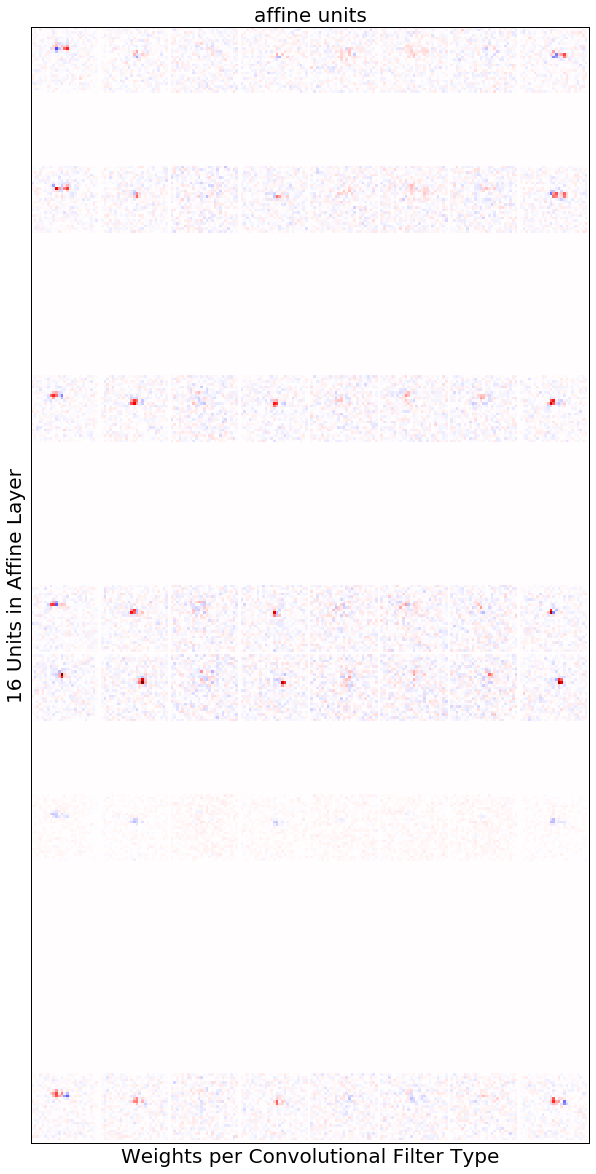

In [29]:
viz.visualize_affine_weights(white_model_path + white_weight_name, 8, fig_size=(20,20), layer_name='layer_4')

#### What are the STAs of these affine inter-units?

In [5]:
sta = viz.get_sta(white_multimodel, 4)

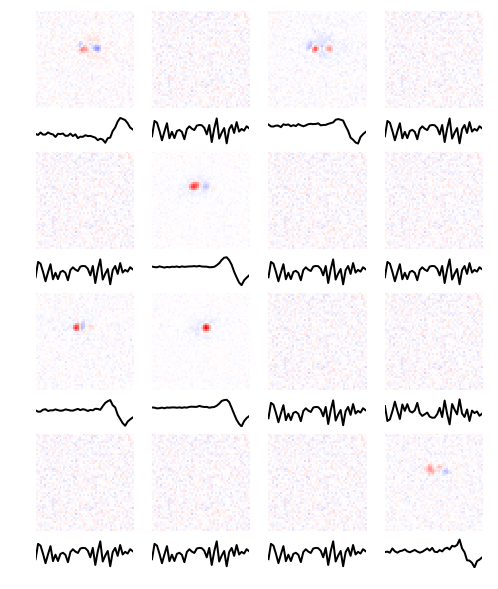

In [8]:
viz.visualize_sta(sta, normalize=True)

# W_1's

In [7]:
white_weights_W1 = get_weights(white_model_path + white_weight_name, layer_name='layer_4')

In [8]:
white_weights_W1.shape

(5000, 16)

In [9]:
np.dot(white_weights_W1[:,1], white_weights_W1[:,3])

0.0

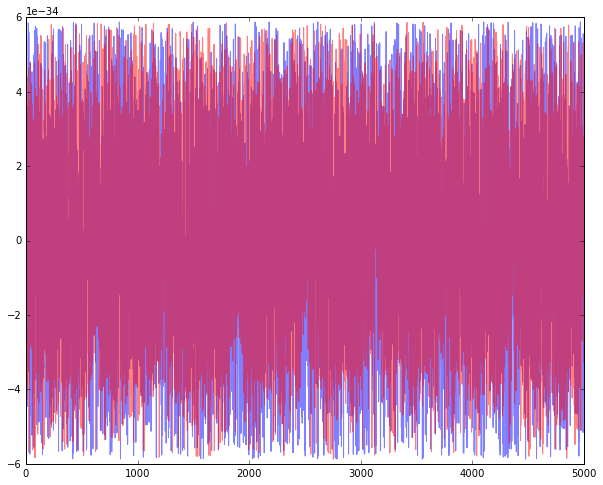

In [11]:
plt.plot(white_weights_W1[:,1], alpha=0.5)
plt.plot(white_weights_W1[:,3], alpha=0.5, color='r')

## W_2's

In [5]:
white_weights_W2 = get_weights(white_model_path + white_weight_name, layer_name='layer_6')

In [179]:
white_weights_W2.shape

(16, 5)

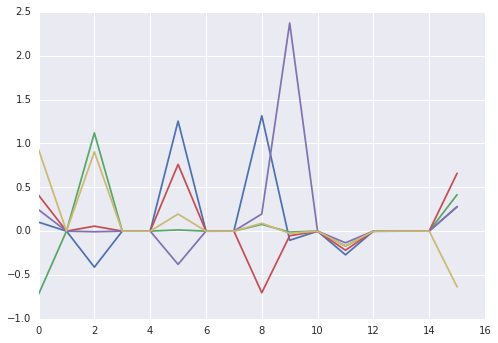

In [181]:
plt.plot(white_weights_W2)

## Visualize natural scenes model

In [9]:
list_layers(natural_model_path, natural_weight_name)

+-----------+------------+-----------+
|layer      | weights    | biases    |
+-----------+------------+-----------+
|   layer_0 |    param_0 |    param_1|
|   layer_1 |            |           |
|   layer_2 |            |           |
|   layer_3 |            |           |
|   layer_4 |    param_0 |    param_1|
|   layer_5 |            |           |
|   layer_6 |    param_0 |    param_1|
+-----------+------------+-----------+


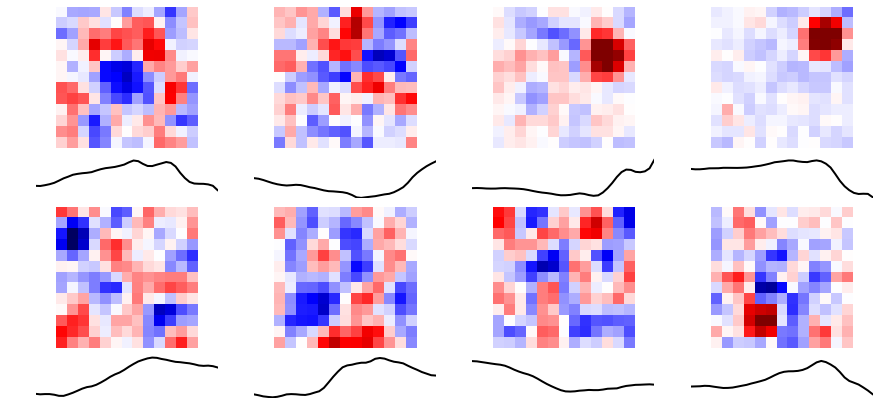

In [19]:
# you can just call viz.visualize_convnet_weights on the model path, but here I'll call it using the array of weights
# for demonstration purposes
natural_weights = get_weights(natural_model_path + natural_weight_name, layer_name='layer_0')
viz.visualize_convnet_weights(natural_weights, fig_size=(15,7), normalize=True)

### Affine units

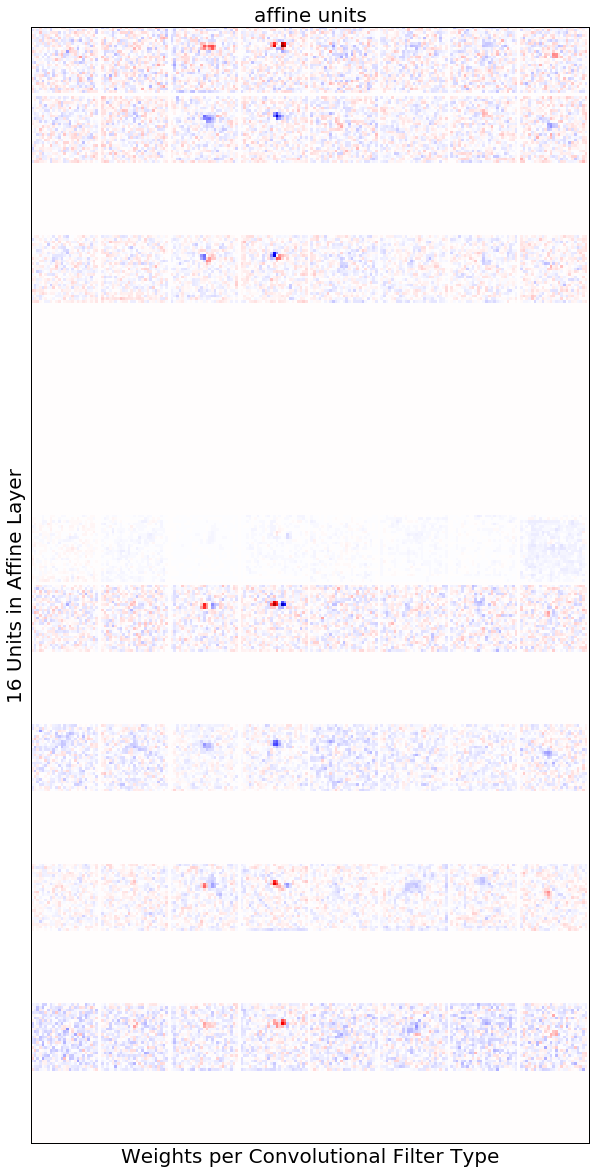

In [12]:
viz.visualize_affine_weights(natural_model_path + natural_weight_name, 8, fig_size=(20,20), layer_name='layer_4')

### STAs of affine inter-units

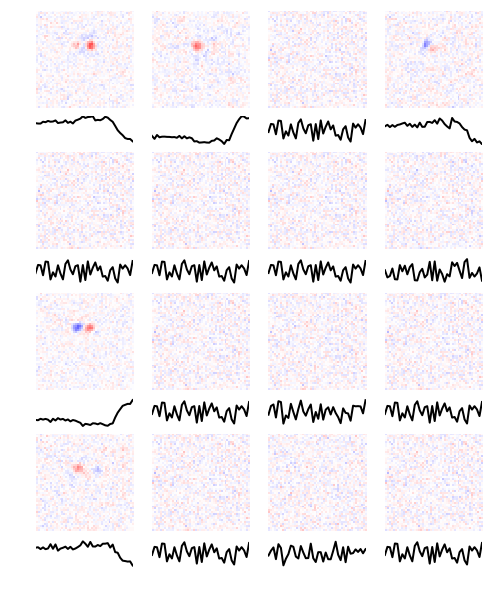

In [19]:
natural_stas = viz.get_sta(natural_multimodel, 4)
viz.visualize_sta(natural_stas)

#### Without normalization?

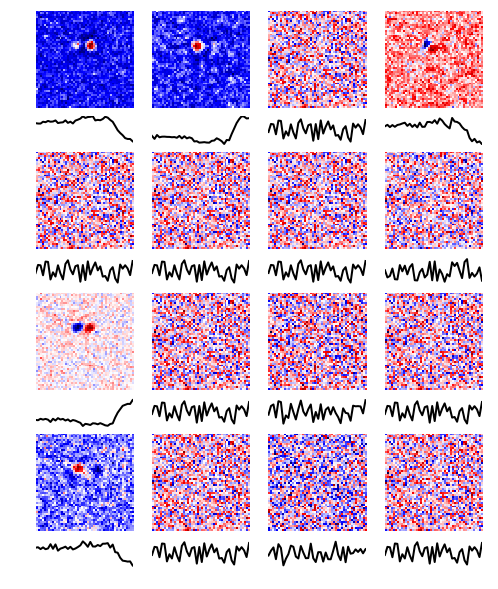

In [21]:
viz.visualize_sta(natural_stas, normalize=False)

## You can also load partial models (like the model up to the conv output, for instance)

In [13]:
partial_fn = load_partial_model(natural_multimodel, 0)

In [14]:
sample_response = partial_fn(np.random.randn(2,40,50,50).astype('float32'))

In [15]:
sample_response.shape

(2, 8, 50, 50)

# How do features of conv layer compare to bipolar cell RFs?

In [14]:
conv_filters.shape

(8, 40, 13, 13)

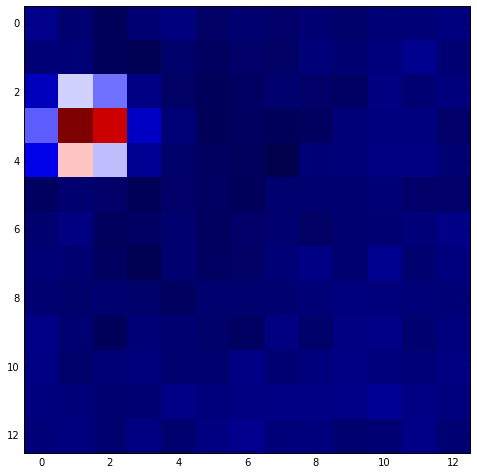

In [15]:
space, time = ft.decompose(conv_filters[0])
plt.imshow(space, cmap='seismic')

In [20]:
space, time = ft.decompose(conv_filters[0])
plt.imshow(space, cmap='seismic')
xaxis = np.linspace(0, 55*space.shape[1], space.shape[1])
yaxis = np.linspace(0, 55*space.shape[0], space.shape[0])
center, sizes, theta = ft.get_ellipse(xaxis, yaxis, space)

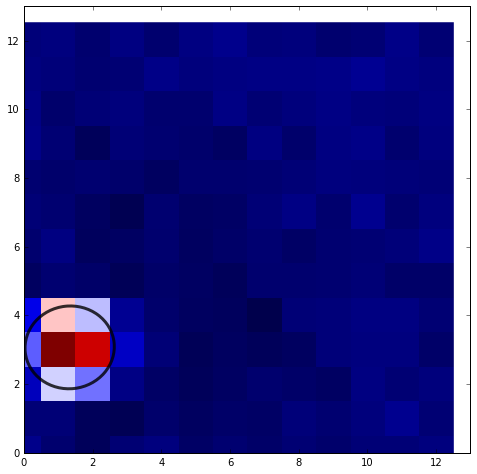

In [29]:
fig = plt.gcf()
ax = plt.gca()
ax.imshow(space, cmap='seismic')
pyviz.ellipse(space, ax=ax)

## Load real bipolar cell RFs

In [7]:
# David's
bipolar_rfs_david_dir = '/Users/lmcintosh/stanford/papers/2015 Surround Size/david_receptive_fields/'
filenames_david = ['B1.txt', 'B2.txt']

# Pablo's
bipolar_rfs_pablo_dir = '/Users/lmcintosh/stanford/papers/2015 Surround Size/pablo_receptive_fields/'
# omitted 'bip2_2d_space.txt' because Pablo didn't recall how many microns on each checker it was
filenames_pablo = ['bip1_2d_space.txt', 'bip3_2d_space.txt', 'bip4_2d_space.txt', 'bip5_2d_space.txt', 'bip7_2d_space.txt']
microns_pablo = [9, 54.6, 54.2, 18.2, 18.2]

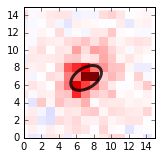

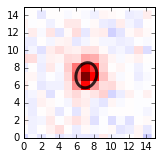

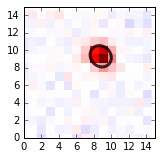

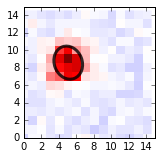

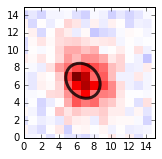

In [8]:
# for f in filenames_david:
#     data = np.loadtxt(bipolar_rfs_david_dir + f, delimiter="\t") # 50 time x 100 space
# get spacing for all bipolar spatial receptive fields
# spatialDelta = 0.022 # mm

fig = plt.gcf()
axs = []

bipolar_widths = []
for idf,f in enumerate(filenames_pablo):
#     if idf not in [3,4]:
    data = np.loadtxt(bipolar_rfs_pablo_dir + f, delimiter="\t")
    xaxis = np.linspace(0, data.shape[1]*microns_pablo[idf], data.shape[1])
    yaxis = np.linspace(0, data.shape[0]*microns_pablo[idf], data.shape[0])
    center, sizes, theta = ft.get_ellipse(xaxis, yaxis, data)
    bipolar_widths.extend([np.max(sizes)])

    ax = plt.subplot(3,2,idf+1)
    axs.append(ax)
    axs[idf].imshow(data, cmap='seismic', clim=[-np.max(abs(data)), np.max(abs(data))])#, extent=[xaxis[0],xaxis[-1],yaxis[0],yaxis[-1]])
#     pyviz.spatial(data, ax=axs[idf])
    plt.grid('off')
    pyviz.ellipse(data, ax=axs[idf])
        

In [20]:
bipolar_widths

[37.330274415293943,
 170.58786895435136,
 150.72078121294589,
 75.216385134832606,
 84.369916802690085]

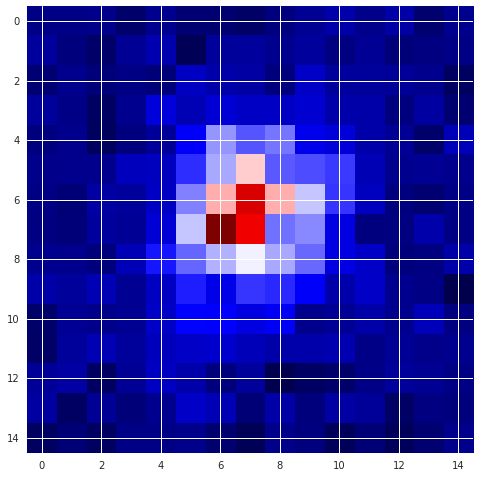

In [236]:
plt.imshow(data, cmap='seismic')

<Container object of 5 artists>

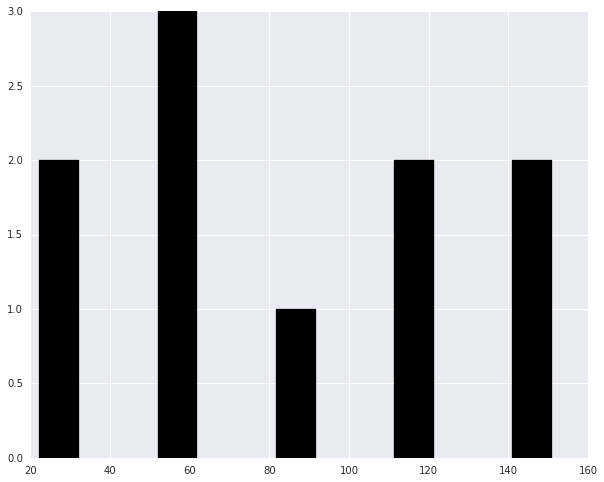

In [237]:
count, xaxis = np.histogram(bipolar_widths, 5)
plt.bar(xaxis[:-1], count, width=10, color='k')

In [25]:
meaningful_conv_filters = [0,1,3,7]
filter_widths = []
for filt in meaningful_conv_filters:
    space, time = ft.decompose(conv_filters[filt])
#     plt.imshow(space, cmap='seismic')
    xaxis = np.linspace(0, 55*space.shape[1], space.shape[1])
    yaxis = np.linspace(0, 55*space.shape[0], space.shape[0])
    center, sizes, theta = ft.get_ellipse(xaxis, yaxis, space)
    filter_widths.extend([np.max(sizes)])

In [26]:
filter_widths

[155.13374079528586,
 159.79015528769889,
 153.20921199751632,
 156.29135424103038]

<Container object of 20 artists>

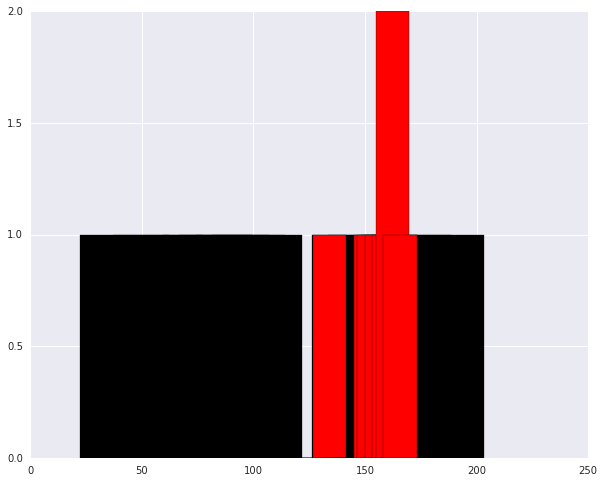

In [239]:
count, xaxis = np.histogram(bipolar_widths, 20)
count_filt, xaxis_filt = np.histogram(filter_widths, 20)
plt.bar(xaxis[:-1], count, width=40, color='k')
plt.bar(xaxis_filt[:-1], count_filt, width=15, color='r')

In [28]:
import seaborn as sns

/usr/local/lib/python2.7/site-packages/matplotlib/__init__.py:872: UserWarning: axes.color_cycle is deprecated and replaced with axes.prop_cycle; please use the latter.
  warnings.warn(self.msg_depr % (key, alt_key))


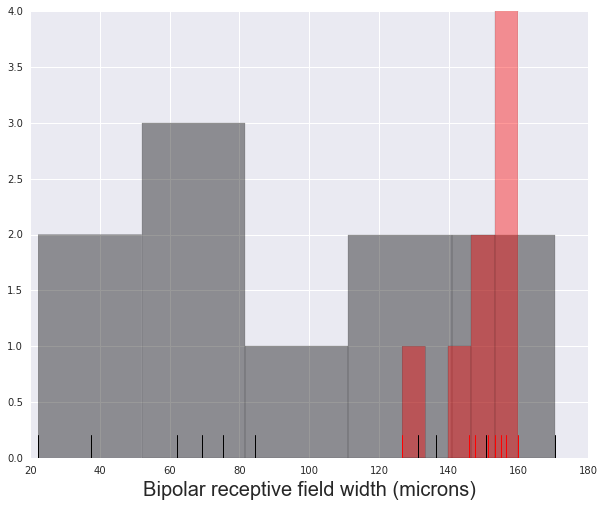

In [242]:
sns.distplot(bipolar_widths, bins=5, color='k', rug=True, kde=False)
sns.distplot(filter_widths, bins=5, color='r', rug=True, kde=False)
plt.xlabel('Bipolar receptive field width (microns)', fontsize=20)

## why no ellipses for first two bipolar cells?

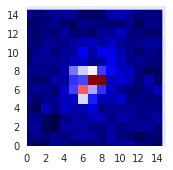

In [172]:
# axs = []
idf = 0
data = np.loadtxt(bipolar_rfs_pablo_dir + filenames_pablo[0], delimiter="\t")
xaxis = np.linspace(0, data.shape[1]*microns_pablo[idf], data.shape[1])
yaxis = np.linspace(0, data.shape[0]*microns_pablo[idf], data.shape[0])
center, sizes, theta = ft.get_ellipse(xaxis, yaxis, data)

ax = plt.subplot(2,2,idf+1)
# axs.append(ax)
# axs[idf].imshow(data, cmap='seismic')#, extent=[xaxis[0],xaxis[-1],yaxis[0],yaxis[-1]])
plt.imshow(data, cmap='seismic')
plt.grid('off')
pyviz.ellipse(data, ax=ax)

In [175]:
xaxis

array([   0.        ,    9.64285714,   19.28571429,   28.92857143,
         38.57142857,   48.21428571,   57.85714286,   67.5       ,
         77.14285714,   86.78571429,   96.42857143,  106.07142857,
        115.71428571,  125.35714286,  135.        ])

In [176]:
yaxis

array([   0.        ,    9.64285714,   19.28571429,   28.92857143,
         38.57142857,   48.21428571,   57.85714286,   67.5       ,
         77.14285714,   86.78571429,   96.42857143,  106.07142857,
        115.71428571,  125.35714286,  135.        ])

In [173]:
center

(1461.1090294170883, -303.50602892045299)

In [174]:
sizes

array([ 236.06072918,  214.04855052])

In [200]:
? pyviz.spatial

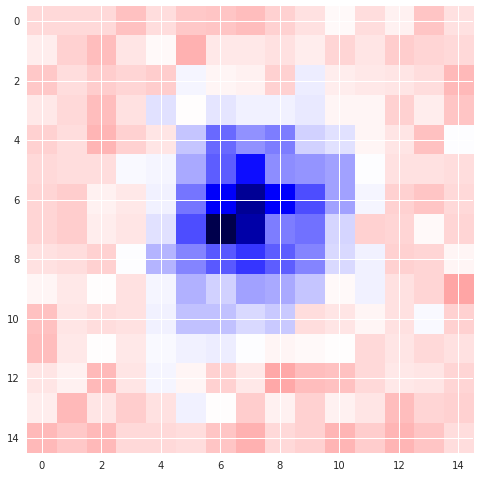

In [199]:
pyviz.spatial(data)
# plt.imshow(data, cmap='seismic')

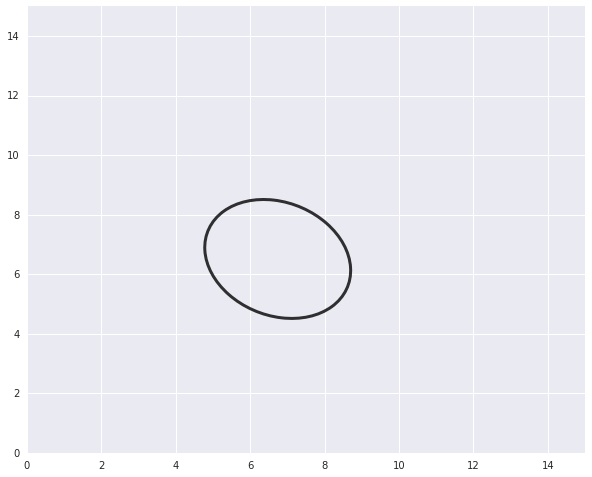

In [198]:
pyviz.ellipse(data)

In [185]:
center, sizes, theta = ft.get_ellipse(np.arange(15), np.arange(15), data)

In [186]:
center

(151.52243250533007, -31.474753787675041)

In [187]:
sizes

array([ 24.48037823,  22.19762395])

In [188]:
theta

1.7100435257351543

# Look at David's 1d RFs

In [243]:
data = np.loadtxt(bipolar_rfs_david_dir + filenames_david[0], delimiter="\t")

In [244]:
data.shape

(50, 100)

In [257]:
data_3d = np.multiply.outer(data, data[10,:])

In [258]:
space, time = ft.decompose(data_3d)

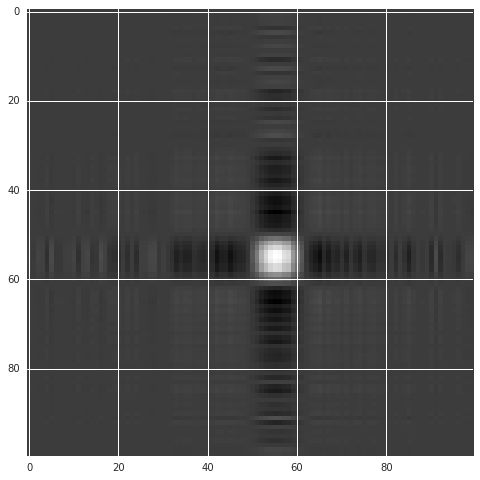

In [259]:
plt.imshow(space)

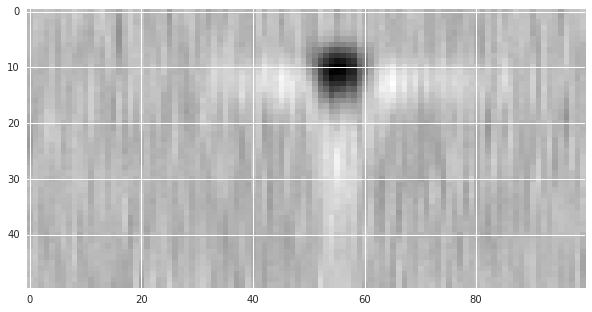

In [256]:
plt.imshow(data)

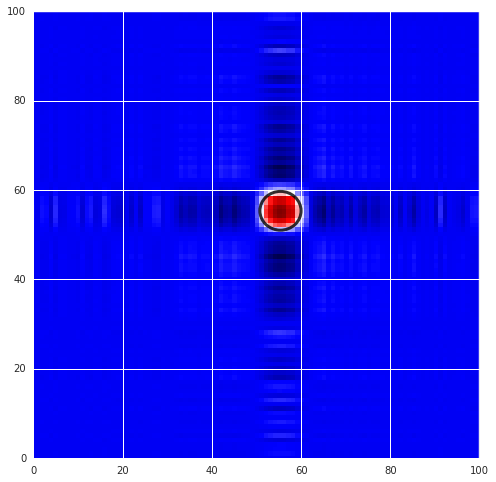

In [270]:
ax = plt.gca()
# pyviz.spatial(space, ax=ax);
# pyviz.ellipse(space, ax=ax);

ax.imshow(space-np.mean(space), cmap='seismic')
pyviz.ellipse(space, ax=ax);

# when you restart this notebook, you can just import * from get_davids_data

In [281]:
import numpy as np
from sklearn.decomposition import PCA
from os.path import expanduser
from scipy.interpolate import interp1d
from scipy.stats import sem

def get_space(rf, spatial_delta, microns_per_deg, scale=True):
    '''Returns a spatial vector for each point in 1d vector rf,
    with zero degrees aligned to the max(abs(rf)).
    INPUT:
    rf              is a 1d numpy array
    spatial_delta   is a float in mm
    microns_per_deg is a float in microns/deg
    
    RETURNS:
    space           is a 1d numpy array in degrees
    '''
    peak  = np.argmax(abs(rf))
    space = np.linspace(-spatial_delta*peak, spatial_delta*(len(rf)-peak), len(rf))
    if scale:
        space *= 1000 # mm to microns
        space /= microns_per_deg
    return space

def load_ganglion_cells(micronsPerDeg=50., pca_mode='space'):
    ''' Returns list of tuples (space, spatial receptive field)
    '''

    data_path = expanduser('~/stanford/papers/2015 Surround Size/david_receptive_fields')
    file_name = data_path + '/allGC.txt'
    data_gc   = np.loadtxt(file_name, delimiter="\t")
    data_gc   = data_gc.reshape((100,80,28))
    nCells    = data_gc.shape[2]

    # get spacing for spatial receptive fields
    spatialDelta = 0.027 # mm

    # since receptive fields are noisy, use PCA
    spatial_rfs = []
    for n in range(nCells):
        pca = PCA(n_components=2)
        if pca_mode == 'space':
            pca.fit(data_gc[:,:,n])
            g_pca = pca.components_[0]
        elif pca_mode == 'time':
            pca.fit(data_gc[:,:,n].T)
            g_pca = np.dot(data_gc[:,:,n].T, pca.components_[0])


        sign_of_pc = -1 * np.sign(g_pca[abs(g_pca) == np.max(abs(g_pca))])
        space      = get_space(g_pca, spatialDelta, micronsPerDeg)

        spatial_rfs.append((space, sign_of_pc * g_pca))

    return spatial_rfs

In [282]:
ganglion_rfs = load_ganglion_cells()

In [285]:
ganglion_rfs[0][0].shape

(80,)

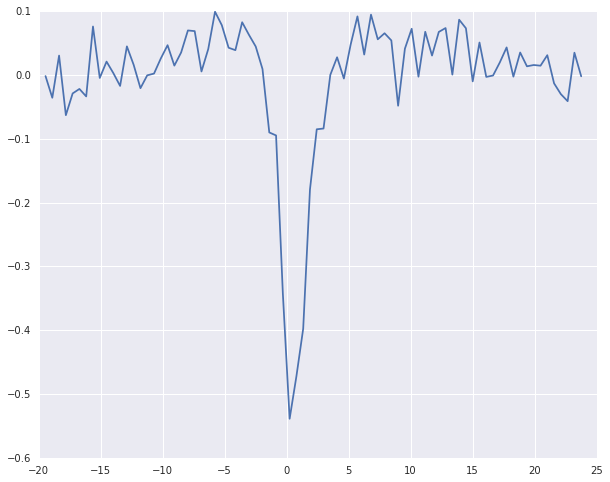

In [286]:
plt.plot(ganglion_rfs[0][0], ganglion_rfs[0][1])

In [295]:
ganglion_rf_sizes = []
microns_per_degree = 50.
for g in ganglion_rfs:
    micron_space = microns_per_degree*g[0] # g[0] is in degrees
    space_2d = np.multiply.outer(g[1], g[1])
    center, sizes, theta = ft.get_ellipse(micron_space, micron_space, space_2d)
    ganglion_rf_sizes.extend(sizes)

In [296]:
ganglion_rf_sizes

[137.21687126678179,
 137.21376521247521,
 169.79878675007356,
 169.49568298215564,
 113.76473795650894,
 113.76169110939858,
 177.52731961787634,
 177.47129922513795,
 197.89716989062686,
 197.88349585131553,
 305.0788701165884,
 305.07433052532963,
 150.70624040443687,
 150.70312559044285,
 114.663771776318,
 114.66167364336151,
 138.82934645061604,
 138.78764281657766,
 148.09606143732327,
 148.07648203478323,
 179.92315079878099,
 179.9175587924976,
 114.19494964748337,
 114.19343651363879,
 96.634177698517149,
 96.632824378340047,
 139.58084005540991,
 139.58059794740947,
 124.04080228473093,
 123.99086058486294,
 264.89669393447036,
 264.85510685143288,
 84.217261957673585,
 84.215371549686154,
 151.68395868216416,
 151.68245245616134,
 170.13253484122563,
 170.10393272787314,
 158.44584736300087,
 158.41203924804424,
 260.06730872886084,
 259.82128931554394,
 251.50417878223328,
 251.49352489596291,
 226.64833295946735,
 226.64817545922716,
 247.82111597839915,
 247.817179885403

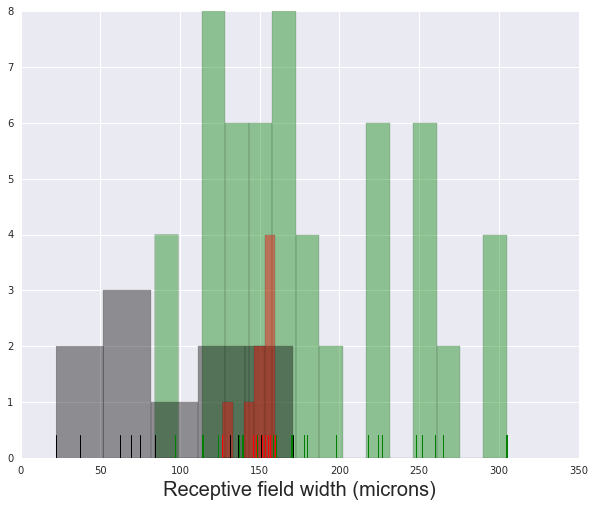

In [300]:
sns.distplot(ganglion_rf_sizes, bins=15, color='g', rug=True, kde=False)
sns.distplot(bipolar_widths, bins=5, color='k', rug=True, kde=False)
sns.distplot(filter_widths, bins=5, color='r', rug=True, kde=False)
plt.xlabel('Receptive field width (microns)', fontsize=20)

In [5]:
ganglion_model_stas = viz.get_sta(white_multimodel, 6)

In [6]:
len(ganglion_model_stas)

5

In [8]:
ganglion_model_stas.shape

(5, 40, 50, 50)

In [9]:
import seaborn as sns

/usr/local/lib/python2.7/site-packages/matplotlib/__init__.py:872: UserWarning: axes.color_cycle is deprecated and replaced with axes.prop_cycle; please use the latter.
  warnings.warn(self.msg_depr % (key, alt_key))


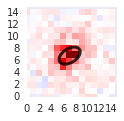

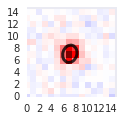

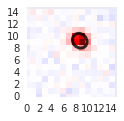

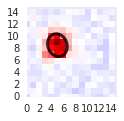

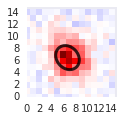

In [10]:
# for f in filenames_david:
#     data = np.loadtxt(bipolar_rfs_david_dir + f, delimiter="\t") # 50 time x 100 space
# get spacing for all bipolar spatial receptive fields
# spatialDelta = 0.022 # mm

fig = plt.gcf()
axs = []

bipolar_widths = []
for idf,f in enumerate(filenames_pablo):
#     if idf not in [3,4]:
    data = np.loadtxt(bipolar_rfs_pablo_dir + f, delimiter="\t")
    xaxis = np.linspace(0, data.shape[1]*microns_pablo[idf], data.shape[1])
    yaxis = np.linspace(0, data.shape[0]*microns_pablo[idf], data.shape[0])
    center, sizes, theta = ft.get_ellipse(xaxis, yaxis, data)
    bipolar_widths.extend([np.max(sizes)])

    ax = plt.subplot(3,2,idf+1)
    axs.append(ax)
    axs[idf].imshow(data, cmap='seismic', clim=[-np.max(abs(data)), np.max(abs(data))])#, extent=[xaxis[0],xaxis[-1],yaxis[0],yaxis[-1]])
#     pyviz.spatial(data, ax=axs[idf])
    plt.grid('off')
    pyviz.ellipse(data, ax=axs[idf])
        

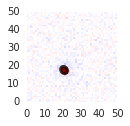

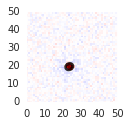

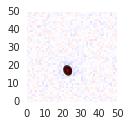

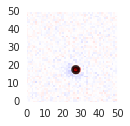

In [ ]:
fig = plt.gcf()
axs = []
gs = []

largest_axis_ganglions = []
for g in range(ganglion_model_stas.shape[0]):
    space, time = ft.decompose(ganglion_model_stas[g])
    xaxis = np.linspace(0, 55*space.shape[0], space.shape[0])
    center, ganglion_sizes, theta = ft.get_ellipse(xaxis, xaxis, space)
    largest_axis_ganglions.extend([np.max(ganglion_sizes)])
    gs.append(space)
    
    ax = plt.subplot(3,2,g+1)
    axs.append(ax)
    axs[g].imshow(space, cmap='seismic', clim=[-np.max(np.abs(space)), np.max(np.abs(space))])#, extent=[xaxis[0],xaxis[-1],yaxis[0],yaxis[-1]])
#     pyviz.spatial(data, ax=axs[idf])
    plt.grid('off')
    pyviz.ellipse(space, ax=axs[g])

In [16]:
largest_axis_ganglions

[234.66847960985589,
 223.44851646868582,
 242.36647996922869,
 193.73362148931923,
 202.92887250749055]

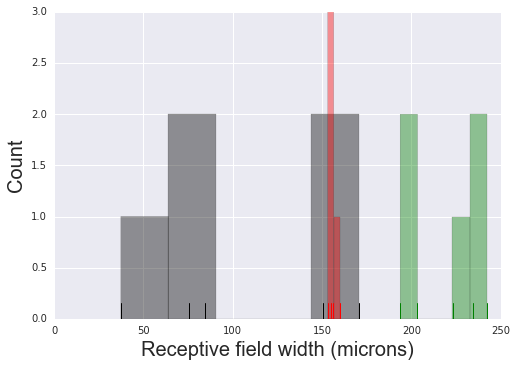

In [35]:
sns.distplot(largest_axis_ganglions, bins=5, color='g', rug=True, kde=False)
sns.distplot(bipolar_widths, bins=5, color='k', rug=True, kde=False)
sns.distplot(filter_widths, bins=2, color='r', rug=True, kde=False)
plt.xlabel('Receptive field width (microns)', fontsize=20)
plt.ylabel('Count', fontsize=20)

In [1]:
pyviz.spatial(gs[0])

NameError: name 'pyviz' is not defined